# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how ="right")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [42]:
# Checking the number of mice.
#another way to to do it : combined_data["Mouse ID"].nunique()

len(combined_data["Mouse ID"].unique())

249

In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

grouped_data= combined_data.groupby(["Mouse ID", "Timepoint"]).count()
grouped_data= pd.DataFrame(grouped_data)
grouped_data.loc[grouped_data["Sex"] > 1, :]


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data = combined_data.loc[combined_data["Mouse ID"] != "g989", :]
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [45]:
# Checking the number of mice in the clean DataFrame.
len(combined_data["Mouse ID"].unique())

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen = combined_data.groupby("Drug Regimen")
my_means = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
my_median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
my_variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
my_std = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
my_sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = {"Mean Tumor Volume": my_means, "Median Tumor Volume": my_median,  
              "Tumor Volume Variance": my_variance, "Tumor Volume Std. Dev.": my_std,   
              "Tumor Volume Std. Err.": my_sem}
summary_df=pd.DataFrame(summary_df)

#display data frame
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

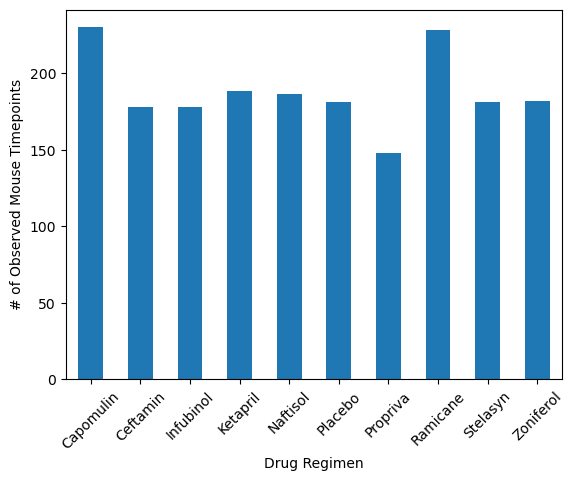

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#create data frame to graph bar plot
timepoints = combined_data.groupby("Drug Regimen")["Timepoint"].count()
timepoints = pd.DataFrame(timepoints)

#create bar chart 
timepoints.plot(kind ='bar', ylabel = "# of Observed Mouse Timepoints", xlabel = "Drug Regimen", rot=45, legend = False)


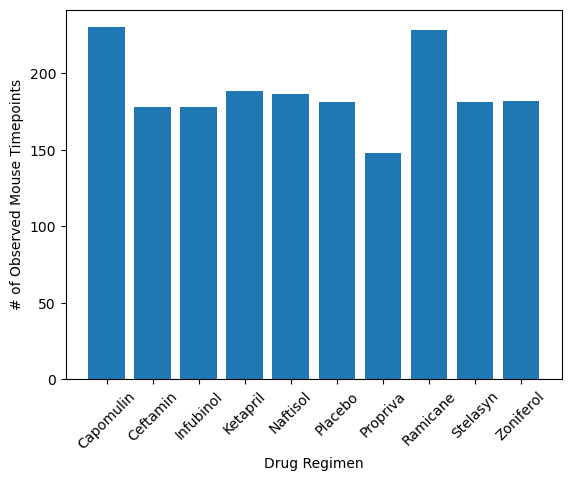

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Created the 2 variables to plot from my timepoints data frame 
index_values = timepoints.index
column_values = timepoints['Timepoint']

#created bar graph 
plt.bar(index_values, column_values)
plt.xticks(rotation=45)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

<Axes: ylabel='Count'>

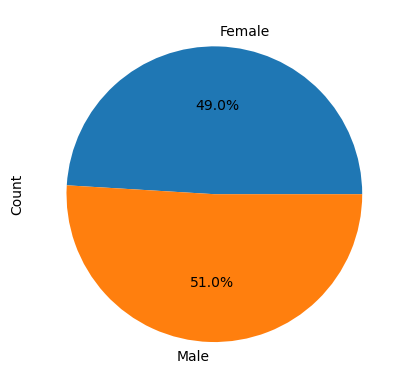

In [50]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender and assign them as variables
gender = combined_data["Sex"].unique()
gender_counts = combined_data.groupby("Sex")["Mouse ID"].count()

#create the data frame with the genders and their coubts
gender_df ={"Gender": gender, "Count": gender_counts}
gender_df = pd.DataFrame(gender_df)

# Make the pie chart
gender_df.plot("Gender", "Count", kind="pie", autopct='%1.1f%%', legend = False)

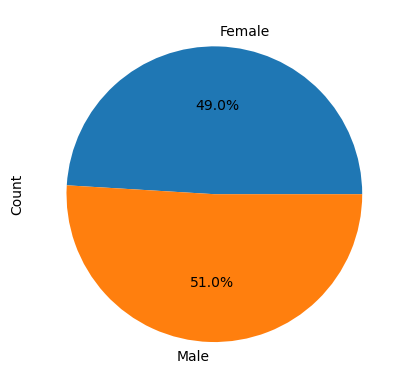

In [52]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender and assign them as variables
gender = combined_data["Sex"].unique()
gender_counts = combined_data.groupby("Sex")["Mouse ID"].count()

#create the data frame with the genders and their coubts
gender_df ={"Gender": gender, "Count": gender_counts}
gender_df = pd.DataFrame(gender_df)

# Make the pie chart
plt.pie(gender_df["Count"], labels = gender_df["Gender"], autopct='%1.1f%%')
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create new dataframe just for the 4 treatments of interest 
treatments = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]
four_treatments_combined_data= combined_data.loc[(combined_data["Drug Regimen"].isin(treatments)), :]
four_treatments_combined_data

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = four_treatments_combined_data.groupby("Mouse ID")["Timepoint"].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(four_treatments_combined_data, max_timepoint, on=["Mouse ID", "Timepoint"], how= "inner")
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,u153,Ceftamin,Female,11,25,0,45.000000,0
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,x226,Ceftamin,Male,23,28,0,45.000000,0
3,t573,Ceftamin,Female,15,27,0,45.000000,0
4,c326,Infubinol,Female,18,25,5,36.321346,0
...,...,...,...,...,...,...,...,...
95,a644,Ramicane,Female,7,17,45,32.978522,1
96,i177,Ramicane,Male,10,18,45,33.562402,3
97,r944,Capomulin,Male,12,25,45,41.581521,2
98,u364,Capomulin,Male,18,17,45,31.023923,3


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each drug in the treatment list 
for treatment in treatments:

   # Create variable to locate the rows which contain mice on each drug and get the tumor volumes
    final_quantile_row = final_tumor_volume[(final_tumor_volume["Drug Regimen"]==treatment)]["Tumor Volume (mm3)"]

   # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_quantile_row.quantile([0.25,0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

    # add tumor volume data to list 
    tumor_vol_data.append(final_quantile_row)

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5*(IQR) 
    upper_bound = Q3 +1.5*(IQR)
    outliars = []
    
    # Loop through all the data points for each drug and check if they are potential outliars 
    for x in final_quantile_row: 
        if x > upper_bound: 
            outliars.append(x)
        if x < lower_bound: 
            outliars.append(x)

    # Print your results         
    print(f"{treatment}'s potential outliers: {outliars}")



Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


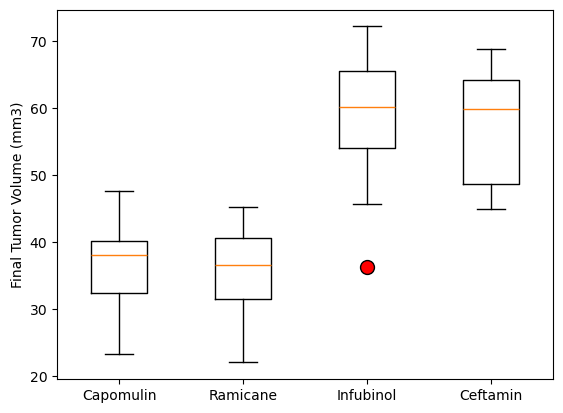

In [55]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments, flierprops=dict(marker= "o", markerfacecolor = "red", markersize = 10))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

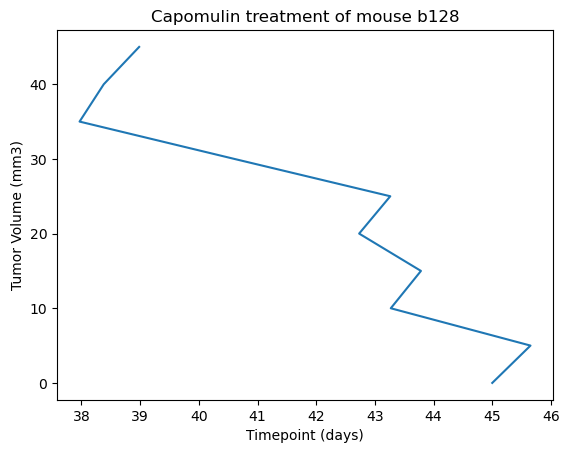

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Create dataframe that only has Capomulin data 
capomulin_only = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"), :]

#Create a dataframe that only has the data for a specific mouse (b128) treated with Capomulin 
b128_data = capomulin_only.loc[(capomulin_only["Mouse ID"] == "b128"), :]

#Identify the variables you will be plotting 
tumor_value = b128_data["Tumor Volume (mm3)"]
time_points = b128_data["Timepoint"]

#Create your line plot 
plt.plot(tumor_value, time_points)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

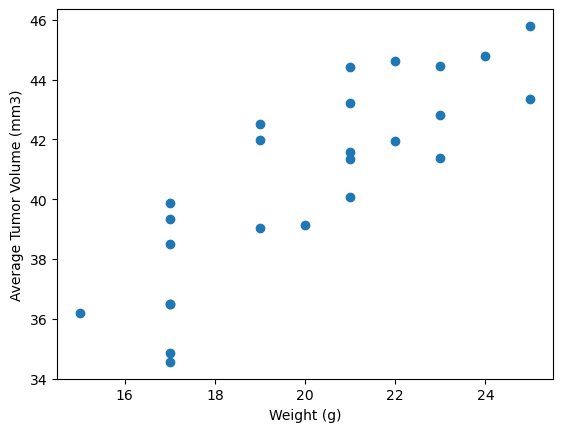

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Listing data frame that has all Capomulin data 
capomulin_only = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"), :]

# Assign variables to be plotted 
avg_tumor_volume = pd.DataFrame(capomulin_only.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())["Tumor Volume (mm3)"]
mouse_weight = pd.DataFrame(capomulin_only.groupby("Mouse ID")["Weight (g)"].mean())["Weight (g)"]


#Create scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


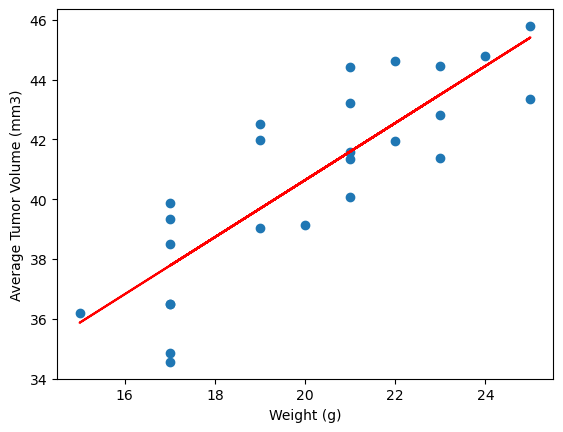

In [58]:
#Create data frame for Capomulin data for just weight and avg tumor size 
capomulin_data = {"Weight (g)": mouse_weight, "Average Tumor Volume (mm3)": avg_tumor_volume}
capomulin_data= pd.DataFrame(capomulin_data)
capomulin_data

x_values = capomulin_data["Weight (g)"]
y_values = capomulin_data["Average Tumor Volume (mm3)"]

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Plot everything on scartter plot 
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize = 15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")
plt.show()
